# Forecasting Electricity Load of Houston
(40 points)
### **Data Set**
A Cross-Domain Data Hub to Track the Impact of COVID-19 on U.S. Electricity Markets

https://github.com/tamu-engineering-research/COVID-EMDA

Particularly, we will use the electricity load data of Houston.

https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv

### **Problem**
1. carry out component decomposition for the electricity load of Houston

2. build an ARIMA model with an optimal order (p, d, q)

3. make a prediction for next 30 days, plot it out, and explain your results.

## Download and Process Dataset
**Please don't change this section!**

You can use the dataframe `df` for the rest of your analysis.

In [9]:
DATA_URL="https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv"

In [10]:
# import pandas, numpy and seaborn. sns.set() will set multiple theme parameters in one step for seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [11]:
# read the data and change the index to datetime index to facilitate the analysis.
df=pd.read_csv(DATA_URL)
df["date"] = pd.to_datetime(df["date"])
df.set_index(pd.to_datetime(df.date, format="%Y-%m-%d"), inplace=True)
df.drop(["date"], axis=1, inplace=True)
df.head(5)

,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,8791.8,8569.7,8326.4,8137.5,8011.9,7978.1,8057.1,8125.8,8289.2,8646.5,...,9957.6,9987.9,9943.9,10181.0,10583.5,10451.0,10230.6,10014.8,9667.7,9287.7
2017-01-02,8836.8,8588.2,8480.8,8506.0,8644.7,8887.0,9176.5,9323.8,9559.9,9602.7,...,10937.1,11037.0,10931.5,10859.0,11112.1,10893.9,10594.2,10196.7,9568.1,8935.5
2017-01-03,8516.6,8238.2,8102.8,8094.3,8265.7,8816.3,9615.5,10009.8,10102.3,10235.3,...,11022.6,10988.9,10883.8,10882.0,11092.8,10889.1,10577.2,10100.1,9488.8,8916.9
2017-01-04,8462.0,8316.5,8259.6,8336.3,8636.6,9357.1,10504.8,10955.0,10944.0,11119.8,...,10713.0,10602.9,10638.3,11099.4,11605.9,11578.6,11416.8,11010.9,10392.6,9784.5
2017-01-05,9472.0,9198.3,9051.1,9031.1,9237.9,9836.5,10685.2,10931.8,10841.5,10912.8,...,10692.5,10696.2,10791.9,11130.9,11378.8,11311.2,11194.9,10882.2,10416.8,9959.7


In [12]:
df['load']= df.sum(axis=1)
df = df[["load"]]
df.head(5)

,load
date,
2017-01-01,220989.4
2017-01-02,235680.6
2017-01-03,237534.1
2017-01-04,247560.4
2017-01-05,251129.3


<AxesSubplot:xlabel='date'>

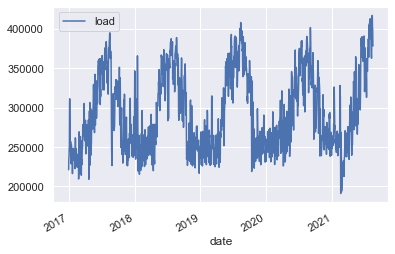

In [13]:
df.plot()

## Component Decomposition

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.load, period=365, model='additive')

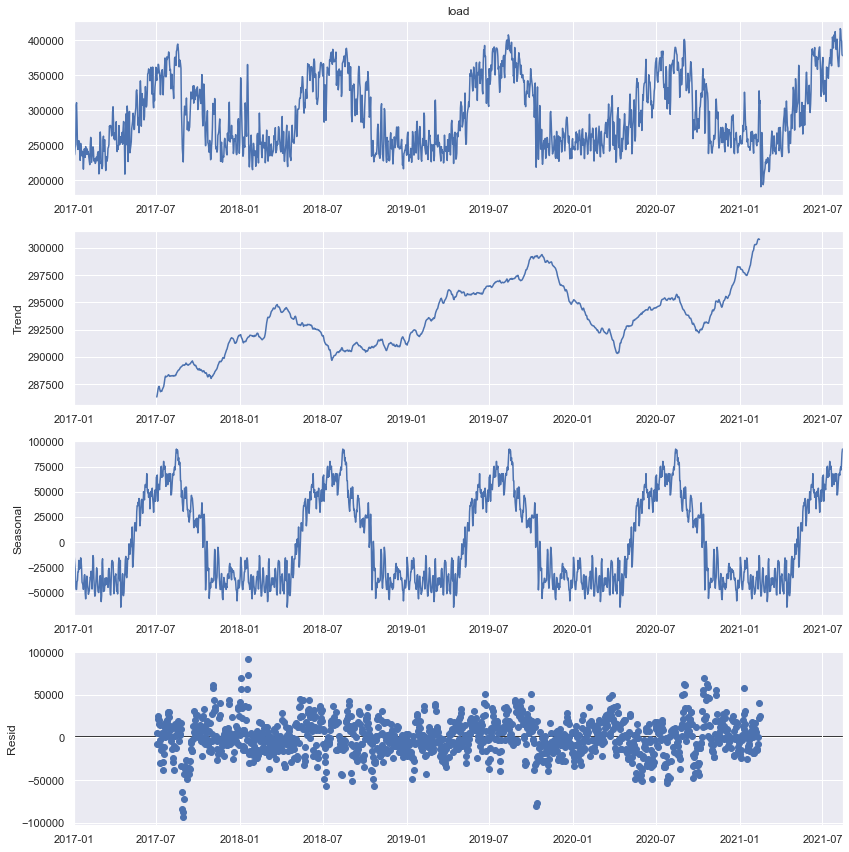

In [29]:
# enlarge the figure to make it easy to see the details.
sns.set(rc={'figure.figsize':(12,12)})
result.plot();

The seasonal dataset will be used for our ARIMA Model and Forecast.

## ARIMA Model and Forecasting

In [37]:
import statsmodels.tsa.arima_model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

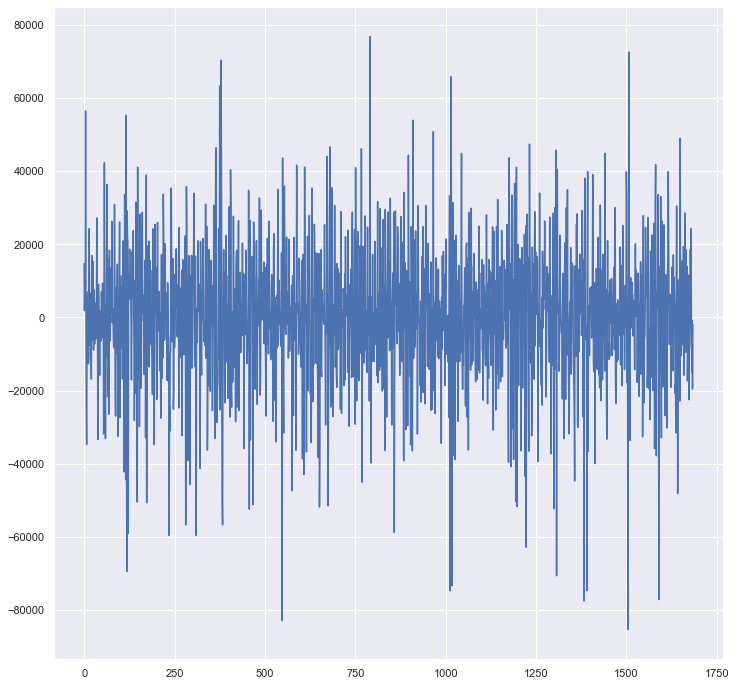

In [74]:
#Detrending the time series to make it stationary
X = df["load"].diff(periods=1).values[1:]

X_train = X[:1180]
X_test = X[1180:]
plt.plot(X)

In [75]:
def arima_order(data, order=10, verbose=True):
  import warnings
  import itertools
  p=d=q=range(0,order)
  pdq = list(itertools.product(p,d,q))
  warnings.filterwarnings("ignore")
  aic_pair={}
  min_aic=9999999
  min_order=(0,0,0)
  for o in pdq:
    try:
      model_arima = ARIMA(data, order=o)
      model_arima_fit=model_arima.fit()
      fit_aic = model_arima_fit.aic
      if verbose: print(o, fit_aic)
      if not np.isnan(fit_aic):
        if min_aic>fit_aic:
          min_aic = fit_aic
          min_order=o
      aic_pair.update({o, rmodel_arima_fit.aic})
    except:
      continue
  return min_order

In [76]:
arima_order(X, order=4)

(0, 0, 0) 37948.04981707666
(0, 0, 1) 37937.506498994466
(0, 0, 2) 37699.58250092009
(0, 0, 3) 37650.60908172814
(0, 1, 0) 39004.88153707642
(0, 1, 1) 37935.960378986136
(0, 1, 2) 37925.16713251653
(0, 1, 3) 37689.03538374964
(0, 2, 0) 40583.22962691487
(0, 2, 1) 38992.150140645506
(0, 2, 2) 37943.07050092833
(0, 2, 3) 37929.3992926604
(1, 0, 0) 37945.62025303463
(1, 0, 1) 37803.11433103816
(1, 0, 2) 37653.81094577482
(1, 0, 3) 37652.37682325846
(1, 1, 0) 38854.296912413614
(1, 2, 0) 40117.23927253547
(2, 0, 0) 37737.56878407226
(2, 0, 1) 37675.06528401437
(2, 0, 2) 37654.42855743737
(2, 0, 3) 37654.35286081524
(2, 1, 0) 38499.35668856728
(2, 1, 1) 37726.09038680255
(2, 2, 0) 39623.442342895956
(3, 0, 0) 37719.82689605277
(3, 0, 1) 37649.449361377134
(3, 0, 2) 37651.17366268703
(3, 0, 3) 37640.76439370805
(3, 1, 0) 38328.91305642009
(3, 1, 1) 37708.55738009848
(3, 2, 0) 39254.92417845325


(3, 0, 3)

In [80]:
model_arima = ARIMA(X_train, order=(3, 0, 3))
model_arima_fit=model_arima.fit()

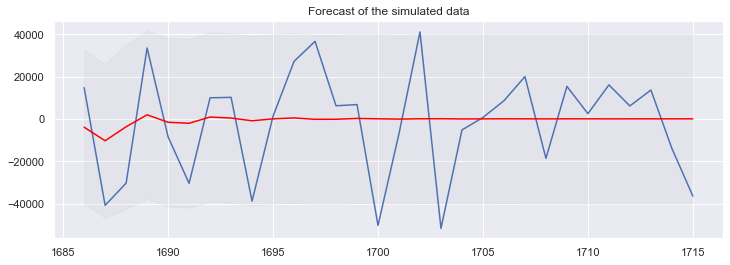

In [81]:
n_pred = 30 # Lead time, or forecasting horizon -- the number of steps ahead for out of sample forecast 
pred_array, se_array, CI_array = model_arima_fit.forecast(steps=n_pred,alpha=0.03) # alpha: confidence level
plt.figure(figsize=(12,4))
pred_array_index = range(1686, 1716)
plt.plot(pred_array_index, X_test[:30])
plt.plot(pred_array_index, pred_array, color = "red")
plt.fill_between(pred_array_index, CI_array[:,0], CI_array[:,1], color = "k", alpha = .03 )
plt.title('Forecast of the simulated data')
plt.show()

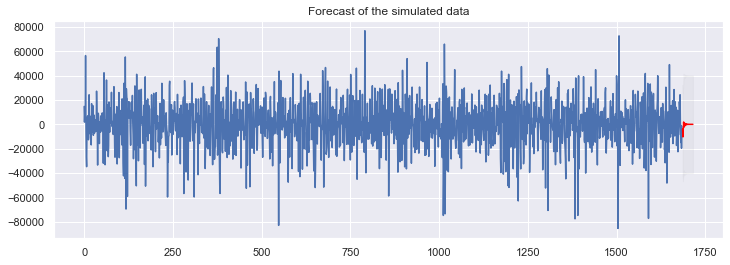

In [85]:
n_pred = 30 # Lead time, or forecasting horizon -- the number of steps ahead for out of sample forecast 
pred_array, se_array, CI_array = model_arima_fit.forecast(steps=n_pred,alpha=0.03) # alpha: confidence level
plt.figure(figsize=(12,4))
plt.plot(X)
pred_array_index = range(1686, 1716)
#plt.plot(pred_array_index, X_test[:30])
plt.plot(pred_array_index, pred_array, color = "red")
plt.fill_between(pred_array_index, CI_array[:,0], CI_array[:,1], color = "k", alpha = .03 )
plt.title('Forecast of the simulated data')
plt.show()

The 30 day forecast given by the optimized ARIMA model seems to show that the city will not have any massive spikes in energy load within the next month. 